# E KNN and K-means CIFAR


transform cifar-10 to grayscale.

- Does knn work similarly good?
- Does k-means work similarly good?
- Demonstrate this similar to B, C and D


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
import scipy.spatial.distance
import seaborn as sns
from sklearn.manifold import TSNE

plt.gray()
import skimage as ski

In [2]:
cifar = tf.keras.datasets.cifar10.load_data()[0] 
X_train, Y_train = cifar[0], cifar[1]
X_test, Y_test = cifar[0], cifar[1]

In [3]:
#convert CIFAR 10 to grayscale
X_train = ski.color.rgb2gray(X_train)
X_test = ski.color.rgb2gray(X_test)

In [4]:
#flatten data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

m = X_train.shape[1]**2

X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

In [5]:
X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

idx = np.random.randint(n_train, size=10000)
x_train_sample = X_train[idx]
y_train_sample = Y_train[idx]

idx = np.random.randint(n_test, size=100)
x_test_sample = X_test[idx]
y_test_sample = Y_test[idx]

karray = [2, 4, 8]

# KNN and Cifar

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_8 = KNeighborsClassifier(n_neighbors=8)

In [7]:
knn_2.fit(x_train_sample, np.ravel(y_train_sample))
knn_4.fit(x_train_sample, np.ravel(y_train_sample))
knn_8.fit(x_train_sample, np.ravel(y_train_sample))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [8]:
# Predict the results
predictions = knn_2.predict(x_train_sample)
print(predictions[:5])

[3 8 2 6 9]


In [9]:
# The score method uses the f1_score to calculate
score = knn_2.score(x_train_sample, y_train_sample)
print(score)

0.6531


In [11]:
# Get those pictures that were misclassified
index = 0
misclassifiedIndexes = []
for label, predict in zip(Y_train, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

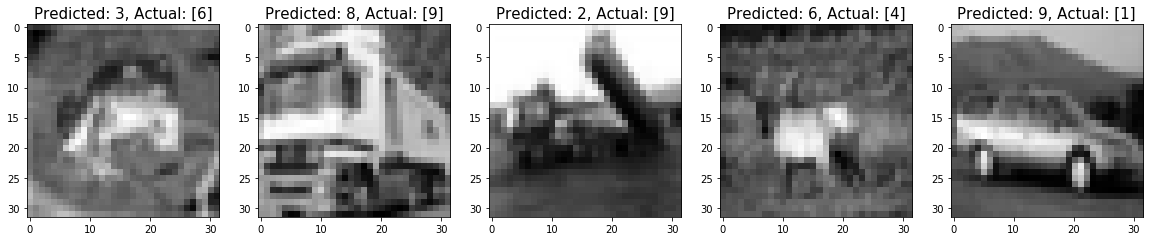

In [13]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_train[badIndex], (32,32)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], Y_train[badIndex]), fontsize = 15)

In [18]:
#pd.DataFrame(np.array(score).T, columns=["k = 2", "k = 4", "k = 8"])
from sklearn.metrics import classification_report
print(classification_report(y_train_sample, predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1011
           1       0.89      0.92      0.90      1005
           2       0.51      0.88      0.65       967
           3       0.70      0.80      0.75      1025
           4       0.46      0.67      0.55       989
           5       0.78      0.50      0.61      1000
           6       0.72      0.46      0.56       992
           7       0.89      0.45      0.59      1014
           8       0.75      0.58      0.65       991
           9       1.00      0.28      0.43      1006

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.73      0.65      0.64     10000
weighted avg       0.73      0.65      0.64     10000



As we can see KNN works very badly with this converted Dataset. 

In [ ]:
# Old method

results = []
def endresult():
    for k in karray:
        result_array = []
        dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
        idx_nearest = np.argpartition(dists, k, axis = 0)[:k]
        nearest_dists = np.take(x_train_sample, idx)
    
        pred = y_train_sample[idx_nearest]
        pred = np.ndarray.transpose(pred)
        pred = pred.reshape(100,k)
        actuals = y_test_sample
        prediction = np.array([])
        
        for row in pred:
            count = np.bincount(row)
            prediction = np.append(prediction, int(np.argmax(count)))
    
        prediction = prediction.astype(int)
        '''We use 1-f1_score since it is an better indicator of quality than the error rate.'''
        calcf1score = f1_score(actuals, prediction, average = 'micro')
        print ("The error rate for KNN with k = {} on this Dataset is {}".format(k, (1 - calcf1score)))

        for i in range(10):
            indices = np.where(actuals == i)
            prediction = prediction.reshape(100,1)
            f1 = 1-(f1_score(actuals[indices], prediction[indices], average = 'micro'))
            result_array.append(f1)
            
        results.append(result_array)
               
endresult()